In [2]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pymongo as pm
import pandas as pd
pd.set_option("display.max_rows",5000)
import event_data_static 

In [3]:
eid_list = event_data_static.get_live_cda_event_ids()
for i,eid in enumerate(eid_list):
    data_dict = event_data_static.get_static_event_data_dict(eid)
    print(i,eid, data_dict)

0 10585 {'title': "Vikram Vedha (Hindi) Box-office Collection for 10-Oct'22: ₹ 2.00 Cr or more?", 'started_at': '2022-10-10T11:00:00', 'ends_at': '2022-10-10T23:59:00'}
1 10557 {'title': 'Total Goals in ATK Mohun Bagan vs Chennaiyin FC match : 3 or more?', 'started_at': '2022-10-10T10:00:00', 'ends_at': '2022-10-10T22:30:00'}
2 10256 {'title': 'On September 15th, 2031, one bitcoin will be worth more than 0.05 troy ounces of gold?', 'started_at': '2022-09-30T22:30:00', 'ends_at': '2031-09-15T23:59:00'}
3 10018 {'title': 'U Mumba to win Pro Kabaddi League 2022?', 'started_at': '2022-09-24T19:20:00', 'ends_at': '2022-12-20T23:59:00'}
4 9331 {'title': "'Drishyam 2' first week Box Office Collection: ₹ 37 Cr or more?", 'started_at': '2022-09-06T15:00:00', 'ends_at': '2022-11-24T23:59:00'}
5 9330 {'title': 'GDP Growth for Q2 2022: 7.8% or more?', 'started_at': '2022-09-06T15:00:00', 'ends_at': '2022-11-30T23:59:00'}
6 9329 {'title': "Any Asian team to win Men's T20 WC 2022?", 'started_at': '2

In [3]:
def get_event_info(event_id):
    client = pm.MongoClient("localhost", 27017)
    db = client.tradex_data_0
    collection = db[str(event_id)]
    cursor = collection.find_one( {"_id" : "info"}, {"_id":0} )
    return cursor

In [4]:
def get_event_hist_data(event_id):
    client = pm.MongoClient("localhost", 27017)
    db = client.tradex_data_0
    collection = db[str(event_id)]
    cursor = collection.find({"_id" : { "$ne" : "info"},
                             },{"_id":0})
    df = pd.DataFrame(cursor)
    return df

In [5]:
def get_executed_trades_data(event_id):
    hist_data = get_event_hist_data(event_id)
    exec_data = pd.DataFrame()
    for i in range(hist_data.shape[0]):
        temp = hist_data["lasttradesinfo"][i]
        if temp != []:
            exec_data = exec_data.append(temp)
            exec_data = exec_data.drop(columns = ["index"])
            exec_data = exec_data.drop_duplicates().reset_index(drop=True)
    exec_data["updatedat"] = exec_data["updatedat"] + dt.timedelta(hours=5, minutes=30)
    exec_data = exec_data.sort_values(by="updatedat", ascending=True)
    return exec_data

In [6]:
def get_best_price(event_id):
    hist_data = get_event_hist_data(event_id)
    hist_data["best_y_p"] = np.nan
    hist_data["best_n_p"] = np.nan
    hist_data["best_y_q"] = np.nan
    hist_data["best_n_q"] = np.nan
    for i in range(hist_data.shape[0]):
        temp = pd.DataFrame(hist_data["orderbook"][i])
        if not temp.empty:
            temp_y = temp[temp["asset"]=="Y"].copy().sort_values(by="price",ascending=False).reset_index(drop=True)
            # print(temp_y)
            if not temp_y.empty:
                # print("best y price",temp_y["price"].iloc[0])
                # print("best y qty",temp_y["qty"].iloc[0])
                hist_data["best_y_p"].iloc[i] = temp_y["price"].iloc[0]
                hist_data["best_y_q"].iloc[i] = temp_y["qty"].iloc[0]
            temp_n = temp[temp["asset"]=="N"].copy().sort_values(by="price",ascending=False).reset_index(drop=True)
            # print(temp_n)
            if not temp_n.empty:
                # print("best n price",temp_n["price"].iloc[0])
                # print("best n qty",temp_n["qty"].iloc[0])
                hist_data["best_n_p"].iloc[i] = temp_n["price"].iloc[0]
                hist_data["best_n_q"].iloc[i] = temp_n["qty"].iloc[0]
    return hist_data

In [7]:
get_event_info(10705)

In [14]:
dfz = get_event_hist_data(12100)

In [9]:
df1 = get_executed_trades_data(10705)

In [12]:
df2 = get_best_price(12100)
# df2 =df2.set_index("timestamp")

C:\Users\aniru\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
df2

,timestamp,orderbook,lasttradesinfo,best_y_p,best_n_p,best_y_q,best_n_q
0,2022-11-15 15:11:00.498,"[{'asset': 'Y', 'price': 10, 'qty': 10, 'value...",[],10.0,58.0,10.0,1.0
1,2022-11-15 15:12:36.439,"[{'asset': 'Y', 'price': 27, 'qty': 10, 'value...",[],27.0,NaN,10.0,NaN
2,2022-11-15 15:13:53.611,"[{'asset': 'Y', 'price': 27, 'qty': 10, 'value...",[],27.0,NaN,10.0,NaN
3,2022-11-15 15:15:11.477,"[{'asset': 'Y', 'price': 10, 'qty': 10, 'value...",[],10.0,NaN,10.0,NaN
4,2022-11-15 15:16:29.494,"[{'asset': 'Y', 'price': 10, 'qty': 10, 'value...",[],10.0,NaN,10.0,NaN
5,2022-11-15 15:17:47.942,"[{'asset': 'Y', 'price': 10, 'qty': 10, 'value...",[],10.0,NaN,10.0,NaN
6,2022-11-15 15:19:05.341,"[{'asset': 'Y', 'price': 40, 'qty': 10, 'value...",[],40.0,NaN,10.0,NaN
7,2022-11-15 15:20:22.026,"[{'asset': 'Y', 'price': 10, 'qty': 10, 'value...",[],10.0,20.0,10.0,1.0
8,2022-11-15 15:21:43.856,"[{'asset': 'Y', 'price': 10, 'qty': 10, 'value...",[],10.0,20.0,10.0,1.0
9,2022-11-15 15:23:01.765,"[{'asset': 'Y', 'price': 10, 'qty': 10, 'value...",[],10.0,20.0,10.0,1.0


In [29]:
print("Exec. Price Yes",df1_y["price"].mean())
print("Best Price Yes",df2["best_y_p"].mean())
print("Exec. Price No",df1_n["price"].mean())
print("Best Price No",df2["best_n_p"].mean())

Exec. Price Yes 63.84595268503314
Best Price Yes 58.936731107205624
Exec. Price No 38.96517931134775
Best Price No 44.5521472392638


In [132]:
df1[df1["side"]=="sell"]

,price,qty,asset,side,updatedat
0,70.0,1,Y,sell,2022-10-06 13:28:14.937
1,30.0,1,N,sell,2022-10-06 13:34:18.073
2,34.0,1,N,sell,2022-10-06 13:34:47.284
3,34.0,2,N,sell,2022-10-06 13:35:08.699
4,34.0,1,N,sell,2022-10-06 13:37:55.909
...,...,...,...,...,...
822,16.0,1,N,sell,2022-10-06 23:58:05.280
828,87.0,2,Y,sell,2022-10-06 23:58:17.277
827,10.0,8,N,sell,2022-10-06 23:58:17.277
830,10.0,1,N,sell,2022-10-06 23:58:20.230


In [134]:
df2

,timestamp,orderbook,lasttradesinfo,best_y_p,best_n_p,best_y_q,best_n_q
0,2022-10-06 13:49:13.407,"[{'asset': 'Y', 'price': 70, 'qty': 2, 'value'...","[{'index': 19, 'price': 70.0, 'qty': 1, 'asset...",70.0,25.0,2.0,1.0
1,2022-10-06 13:50:30.094,"[{'asset': 'Y', 'price': 72, 'qty': 1, 'value'...","[{'index': 19, 'price': 30.0, 'qty': 1, 'asset...",72.0,25.0,1.0,1.0
2,2022-10-06 13:51:41.039,"[{'asset': 'Y', 'price': 74, 'qty': 1, 'value'...","[{'index': 19, 'price': 30.0, 'qty': 1, 'asset...",74.0,25.0,1.0,1.0
3,2022-10-06 13:52:52.294,"[{'asset': 'Y', 'price': 70, 'qty': 2, 'value'...","[{'index': 19, 'price': 30, 'qty': 1, 'asset':...",70.0,25.0,2.0,1.0
4,2022-10-06 13:54:03.048,"[{'asset': 'Y', 'price': 70, 'qty': 2, 'value'...","[{'index': 19, 'price': 30.0, 'qty': 1, 'asset...",70.0,27.0,2.0,5.0
...,...,...,...,...,...,...,...
477,2022-10-06 23:57:01.618,"[{'asset': 'Y', 'price': 84, 'qty': 1, 'value'...","[{'index': 19, 'price': 7.0, 'qty': 1, 'asset'...",84.0,12.0,1.0,5.0
478,2022-10-06 23:58:14.226,"[{'asset': 'Y', 'price': 84, 'qty': 1, 'value'...","[{'index': 19, 'price': 8.0, 'qty': 1, 'asset'...",84.0,13.0,1.0,2.0
479,2022-10-06 23:59:26.965,"[{'asset': 'Y', 'price': 85, 'qty': 1, 'value'...","[{'index': 19, 'price': 13.0, 'qty': 1, 'asset...",85.0,9.0,1.0,79.0
480,2022-10-07 00:00:40.794,"[{'asset': 'Y', 'price': 85, 'qty': 1, 'value'...","[{'index': 19, 'price': 13.0, 'qty': 1, 'asset...",85.0,9.0,1.0,79.0


In [15]:
dfz

,timestamp,orderbook,lasttradesinfo
0,2022-11-15 15:11:00.498,"[{'asset': 'Y', 'price': 10, 'qty': 10, 'value...",[]
1,2022-11-15 15:12:36.439,"[{'asset': 'Y', 'price': 27, 'qty': 10, 'value...",[]
2,2022-11-15 15:13:53.611,"[{'asset': 'Y', 'price': 27, 'qty': 10, 'value...",[]
3,2022-11-15 15:15:11.477,"[{'asset': 'Y', 'price': 10, 'qty': 10, 'value...",[]
4,2022-11-15 15:16:29.494,"[{'asset': 'Y', 'price': 10, 'qty': 10, 'value...",[]
5,2022-11-15 15:17:47.942,"[{'asset': 'Y', 'price': 10, 'qty': 10, 'value...",[]
6,2022-11-15 15:19:05.341,"[{'asset': 'Y', 'price': 40, 'qty': 10, 'value...",[]
7,2022-11-15 15:20:22.026,"[{'asset': 'Y', 'price': 10, 'qty': 10, 'value...",[]
8,2022-11-15 15:21:43.856,"[{'asset': 'Y', 'price': 10, 'qty': 10, 'value...",[]
9,2022-11-15 15:23:01.765,"[{'asset': 'Y', 'price': 10, 'qty': 10, 'value...",[]


In [59]:
df3 = get_executed_trades_data(10705)

In [82]:
df3

,price,qty,asset,side,updatedat,no_price
0,52.000000,2,Y,buy,2022-10-13 11:37:24.206,0
1,48.000000,2,N,buy,2022-10-13 11:37:24.206,0
2,52.000000,10,Y,buy,2022-10-13 11:39:03.524,0
3,48.000000,2,N,buy,2022-10-13 11:39:03.524,0
4,48.000000,8,N,buy,2022-10-13 11:39:03.524,0
5,57.000000,1,Y,buy,2022-10-13 11:40:41.876,0
6,43.000000,1,N,buy,2022-10-13 11:40:41.876,0
7,42.000000,5,N,buy,2022-10-13 11:42:47.196,0
8,60.000000,5,Y,buy,2022-10-13 11:42:47.196,0
9,40.000000,1,N,buy,2022-10-13 11:43:38.710,0


In [45]:
for j in df3["updatedat"].unique():
    temp_df = (df3[df3["updatedat"]==j])
    if temp_df.shape[0]>1:
        df3.loc[yes_index,"no_price"] = (temp_df[temp_df["asset"]=="N"])["price"]
        print(temp_df)

   price  qty asset side               updatedat  oneprice  no_price
0   45.0    1     N  buy 2022-10-09 10:16:46.611       0.0       NaN
1   55.0    1     Y  buy 2022-10-09 10:16:46.611      55.0       NaN
   price  qty asset side               updatedat  oneprice  no_price
2   43.0    1     N  buy 2022-10-09 10:31:42.379       0.0       NaN
3   58.0    1     Y  buy 2022-10-09 10:31:42.379      58.0       NaN
   price  qty asset side               updatedat  oneprice  no_price
5   45.0    1     N  buy 2022-10-09 10:50:50.568       0.0       NaN
6   55.0    1     Y  buy 2022-10-09 10:50:50.568      55.0       NaN
   price  qty asset side               updatedat  oneprice  no_price
8   47.0    1     N  buy 2022-10-09 11:05:53.945       0.0       NaN
7   53.0    1     Y  buy 2022-10-09 11:05:53.945      53.0       NaN
    price  qty asset side               updatedat  oneprice  no_price
9    53.0    1     Y  buy 2022-10-09 11:06:05.965      53.0       NaN
10   47.0    1     N  buy 2022-1

ValueError: Must have equal len keys and value when setting with an iterable

In [46]:
df3

,price,qty,asset,side,updatedat,oneprice,no_price
0,45.0,1,N,buy,2022-10-09 10:16:46.611,0.0,NaN
1,55.0,1,Y,buy,2022-10-09 10:16:46.611,55.0,NaN
2,43.0,1,N,buy,2022-10-09 10:31:42.379,0.0,NaN
3,58.0,1,Y,buy,2022-10-09 10:31:42.379,58.0,NaN
4,58.0,1,Y,buy,2022-10-09 10:36:43.232,0.0,NaN
...,...,...,...,...,...,...,...
603,99.0,4,Y,buy,2022-10-09 22:27:43.166,99.0,NaN
604,2.0,4,N,buy,2022-10-09 22:27:43.166,0.0,NaN
606,2.0,1,N,buy,2022-10-09 22:27:53.101,0.0,2.0
605,99.0,1,Y,buy,2022-10-09 22:27:53.101,99.0,NaN


In [62]:
df3["no_price"] = 0
for i in df3.index:
    if i<df3.shape[0]:
        if df3.loc[i,"updatedat"] == df3.loc[i+1,"updatedat"]:
            time = df3.loc[i,"updatedat"]
            mask_time = df3["updatedat"]==time
            mask_y = (df3["updatedat"]==time) & (df3["asset"]=="Y")
            mask_n = (df3["updatedat"]==time) & (df3["asset"]=="N")
            print(df3[mask_time])
            # if (df3.loc[mask_y,"no_price"].shape) == (df3.loc[mask_n,"price"].shape):
            #     df3.loc[mask_y,"no_price"] = df3.loc[mask_n,"price"].values
            #     print(df3.loc[mask_y])
                # print(df3.loc[mask_n,"price"])

   price  qty asset side               updatedat  no_price
0   52.0    2     Y  buy 2022-10-13 11:37:24.206         0
1   48.0    2     N  buy 2022-10-13 11:37:24.206         0
   price  qty asset side               updatedat  no_price
2   52.0   10     Y  buy 2022-10-13 11:39:03.524         0
3   48.0    2     N  buy 2022-10-13 11:39:03.524         0
4   48.0    8     N  buy 2022-10-13 11:39:03.524         0
   price  qty asset side               updatedat  no_price
2   52.0   10     Y  buy 2022-10-13 11:39:03.524         0
3   48.0    2     N  buy 2022-10-13 11:39:03.524         0
4   48.0    8     N  buy 2022-10-13 11:39:03.524         0
   price  qty asset side               updatedat  no_price
5   57.0    1     Y  buy 2022-10-13 11:40:41.876         0
6   43.0    1     N  buy 2022-10-13 11:40:41.876         0
   price  qty asset side               updatedat  no_price
7   42.0    5     N  buy 2022-10-13 11:42:47.196         0
8   60.0    5     Y  buy 2022-10-13 11:42:47.196        

KeyError: 1898

In [64]:
df3.drop("no_price")

KeyError: "['no_price'] not found in axis"

In [56]:
df3_new = df3[df3["no_price"]!=0].copy()

<AxesSubplot:>

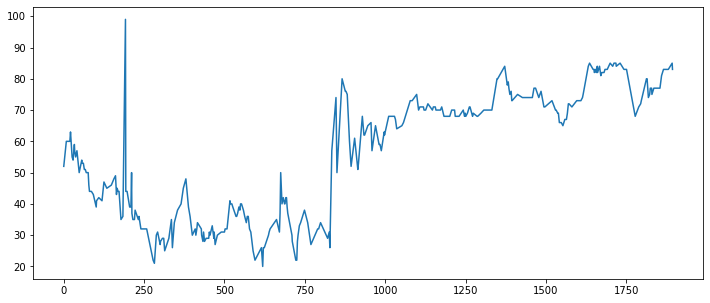

In [57]:
df3_new["price"].plot(figsize=(12,5))

<AxesSubplot:>

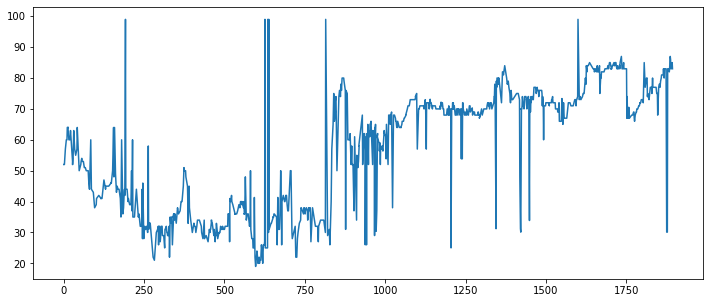

In [ ]:
(df3[df3["asset"]=="Y"])["price"].plot(figsize=(12,5))

In [17]:
df3_new["total_price"] = df3_new["price"] + df3_new["no_price"]

<AxesSubplot:>

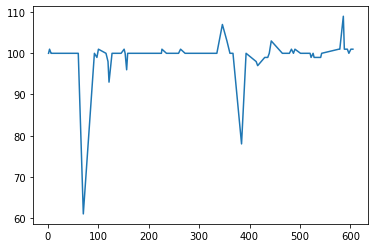

In [18]:
df3_new["total_price"].plot()

In [ ]:
df3_new.head(20)

In [ ]:
df3.iloc[65:75]

In [26]:
df3_new2 = df3_new[df3_new["side"]=="buy"]

<AxesSubplot:>

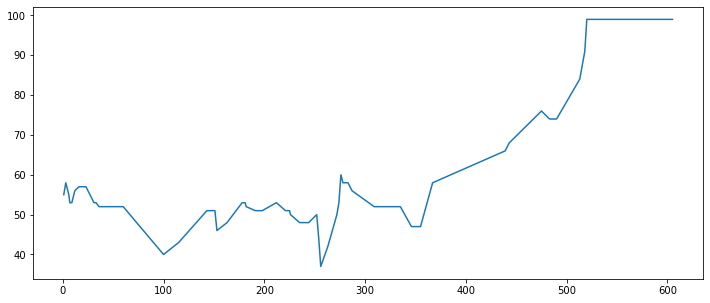

In [28]:
df3_new2["price"].plot(figsize=(12,5))

<AxesSubplot:>

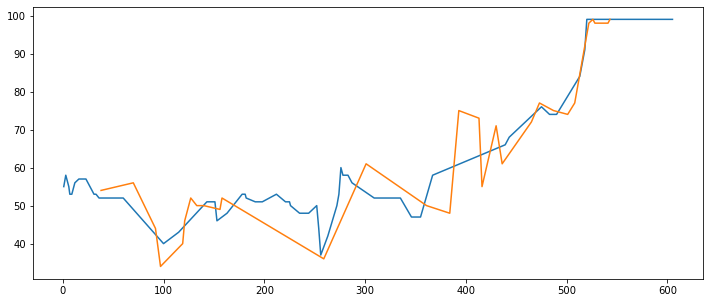

In [30]:
(df3_new[df3_new["side"]=="buy"])["price"].plot(figsize=(12,5))
(df3_new[df3_new["side"]=="sell"])["price"].plot(figsize=(12,5))

In [31]:
df3

,price,qty,asset,side,updatedat,no_price
0,45.0,1,N,buy,2022-10-09 10:16:46.611,0.0
1,55.0,1,Y,buy,2022-10-09 10:16:46.611,45.0
2,43.0,1,N,buy,2022-10-09 10:31:42.379,0.0
3,58.0,1,Y,buy,2022-10-09 10:31:42.379,43.0
4,58.0,1,Y,buy,2022-10-09 10:36:43.232,0.0
...,...,...,...,...,...,...
603,99.0,4,Y,buy,2022-10-09 22:27:43.166,2.0
604,2.0,4,N,buy,2022-10-09 22:27:43.166,0.0
606,2.0,1,N,buy,2022-10-09 22:27:53.101,0.0
605,99.0,1,Y,buy,2022-10-09 22:27:53.101,2.0


In [85]:
df4 = df3.copy()
df4["price"] = np.where((df3["asset"]=="N"),100-df3["price"],df3["price"])
df4["side"] = np.where((df3["asset"]=="N") & (df3["side"]=="buy"),"sell",np.where((df3["asset"]=="N") & (df3["side"]=="sell"),"buy",df3["side"]))
df4["asset"] = np.where(df3["asset"]=="N","Y","Y")
df4

,price,qty,asset,side,updatedat,no_price
0,52.000000,2,Y,buy,2022-10-13 11:37:24.206,0
1,52.000000,2,Y,sell,2022-10-13 11:37:24.206,0
2,52.000000,10,Y,buy,2022-10-13 11:39:03.524,0
3,52.000000,2,Y,sell,2022-10-13 11:39:03.524,0
4,52.000000,8,Y,sell,2022-10-13 11:39:03.524,0
5,57.000000,1,Y,buy,2022-10-13 11:40:41.876,0
6,57.000000,1,Y,sell,2022-10-13 11:40:41.876,0
7,58.000000,5,Y,sell,2022-10-13 11:42:47.196,0
8,60.000000,5,Y,buy,2022-10-13 11:42:47.196,0
9,60.000000,1,Y,sell,2022-10-13 11:43:38.710,0


In [84]:
df3.head(20)

,price,qty,asset,side,updatedat,no_price
0,52.0,2,Y,buy,2022-10-13 11:37:24.206,0
1,48.0,2,N,buy,2022-10-13 11:37:24.206,0
2,52.0,10,Y,buy,2022-10-13 11:39:03.524,0
3,48.0,2,N,buy,2022-10-13 11:39:03.524,0
4,48.0,8,N,buy,2022-10-13 11:39:03.524,0
5,57.0,1,Y,buy,2022-10-13 11:40:41.876,0
6,43.0,1,N,buy,2022-10-13 11:40:41.876,0
7,42.0,5,N,buy,2022-10-13 11:42:47.196,0
8,60.0,5,Y,buy,2022-10-13 11:42:47.196,0
9,40.0,1,N,buy,2022-10-13 11:43:38.710,0


In [76]:
df4["asset"].value_counts()

Y    1898
Name: asset, dtype: int64

<AxesSubplot:>

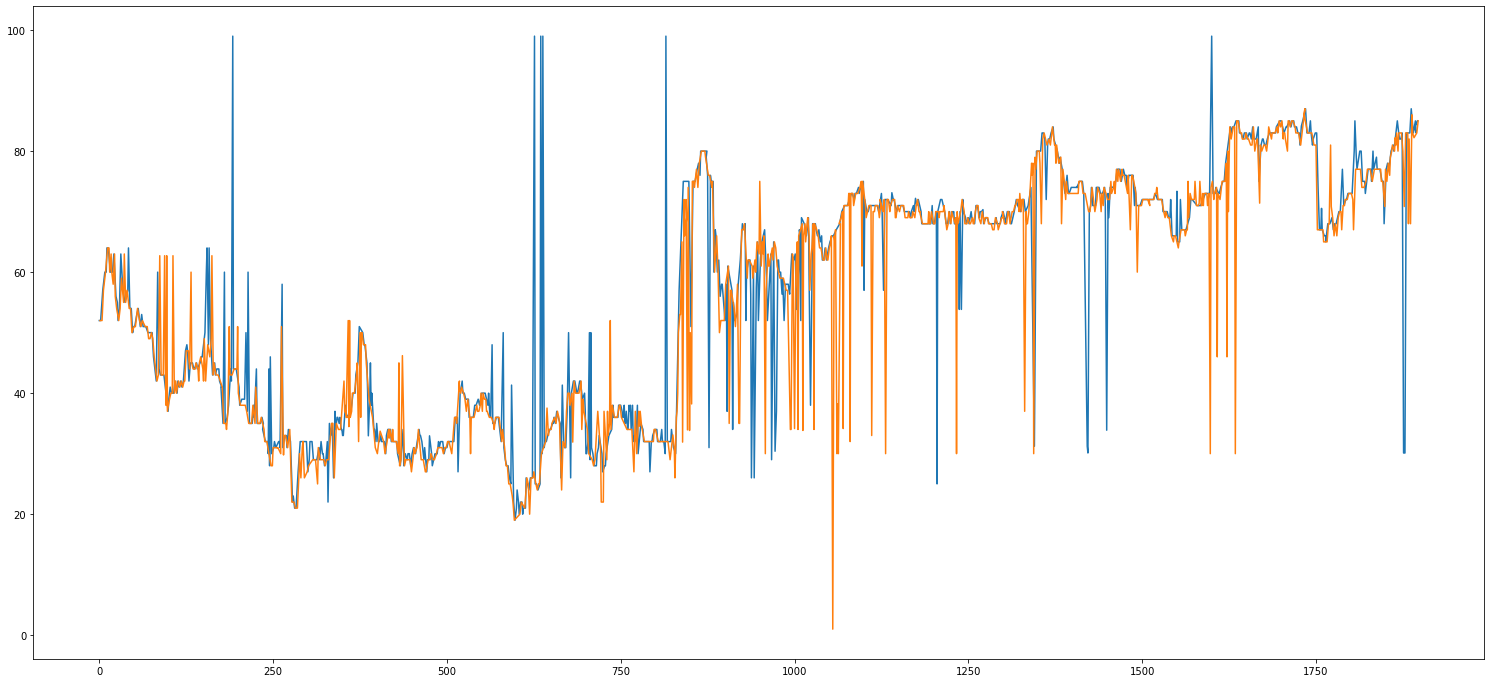

In [88]:
df4[df4["side"]=="buy"]["price"].plot(figsize=(26,12))
df4[df4["side"]=="sell"]["price"].plot(figsize=(26,12))

In [89]:
df4[150:200]

,price,qty,asset,side,updatedat,no_price
150,42.000000,1,Y,sell,2022-10-13 12:29:54.129,0
151,49.000000,1,Y,sell,2022-10-13 12:30:25.221,0
152,50.000000,1,Y,buy,2022-10-13 12:30:25.221,0
153,42.000000,1,Y,sell,2022-10-13 12:31:22.405,0
154,60.000000,6,Y,buy,2022-10-13 12:32:01.469,0
155,64.000000,1,Y,buy,2022-10-13 12:32:34.356,0
156,48.000000,1,Y,sell,2022-10-13 12:32:50.339,0
157,48.000000,1,Y,buy,2022-10-13 12:32:50.339,0
158,64.000000,1,Y,buy,2022-10-13 12:35:16.839,0
159,46.000000,2,Y,sell,2022-10-13 12:35:30.907,0


In [90]:
from lasttradesinfo import clean_lastTradesInfo_df

In [109]:
now_df = clean_lastTradesInfo_df(10813)

In [110]:
now_df

,index,price,qty,asset,side,updatedat
0,19,81,15,N,sell,2022-10-16 21:48:49.432000+05:30
1,18,19,15,Y,sell,2022-10-16 21:48:49.432000+05:30
2,17,19,1,Y,sell,2022-10-16 21:49:09.109000+05:30
3,16,19,1,Y,sell,2022-10-16 21:49:16.948000+05:30
4,15,19,2,Y,sell,2022-10-16 21:49:24.876000+05:30
5,14,22,1,Y,sell,2022-10-16 21:50:12.805000+05:30
6,9,21,1,Y,buy,2022-10-16 21:51:53.627000+05:30
7,8,21,25,Y,buy,2022-10-16 21:52:15.791000+05:30
8,13,21,25,Y,sell,2022-10-16 21:52:15.791000+05:30
9,7,21,9,Y,buy,2022-10-16 21:52:21.201000+05:30


In [100]:
for j in now_df["updatedat"].unique():
    temp_df = (now_df[now_df["updatedat"]==j])
    if temp_df.shape[0]>1:
        # df3.loc[yes_index,"no_price"] = (temp_df[temp_df["asset"]=="N"])["price"]
        print(temp_df)

   index  price  qty asset  side                        updatedat
0      9   10.0   50     N   buy 2022-10-16 19:30:59.580000+05:30
1     17   10.0   47     N  sell 2022-10-16 19:30:59.580000+05:30
2     18   10.0    1     N  sell 2022-10-16 19:30:59.580000+05:30
3     19   10.0    1     N  sell 2022-10-16 19:30:59.580000+05:30
   index  price  qty asset  side                        updatedat
5      6   11.0   10     N   buy 2022-10-16 19:32:36.666000+05:30
6      7   89.0    1     Y   buy 2022-10-16 19:32:36.666000+05:30
7     16   11.0    9     N  sell 2022-10-16 19:32:36.666000+05:30
    index  price  qty asset  side                        updatedat
8       5   12.0   10     N   buy 2022-10-16 19:32:59.231000+05:30
9      14   12.0    8     N  sell 2022-10-16 19:32:59.231000+05:30
10     15   11.0    2     N  sell 2022-10-16 19:32:59.231000+05:30
    index  price  qty asset  side                        updatedat
11      4   12.0    1     N   buy 2022-10-16 19:33:37.905000+05:30
12  

In [111]:
df4 = now_df.copy()
df4["price"] = np.where((df4["asset"]=="N"),100-df4["price"],df4["price"])
df4["side"] = np.where((df4["asset"]=="N") & (df4["side"]=="buy"),"sell",np.where((df4["asset"]=="N") & (df4["side"]=="sell"),"buy",df4["side"]))
df4["asset"] = np.where(df4["asset"]=="N","Y","Y")
df4 = df4.drop(columns=["index","side"])

In [108]:
df4.drop_duplicates()

,price,qty,asset,updatedat
0,22,1,Y,2022-10-16 21:40:07.581000+05:30
1,22,1,Y,2022-10-16 21:40:17.458000+05:30
3,24,1,Y,2022-10-16 21:40:45.522000+05:30
4,23,1,Y,2022-10-16 21:40:45.522000+05:30
5,23,1,Y,2022-10-16 21:41:48.909000+05:30
6,24,2,Y,2022-10-16 21:41:52.961000+05:30
7,23,2,Y,2022-10-16 21:41:52.961000+05:30
8,22,1,Y,2022-10-16 21:43:21.247000+05:30
10,24,2,Y,2022-10-16 21:43:30.092000+05:30
11,23,2,Y,2022-10-16 21:43:30.092000+05:30


In [112]:
df4.drop_duplicates()

,price,qty,asset,updatedat
0,19,15,Y,2022-10-16 21:48:49.432000+05:30
2,19,1,Y,2022-10-16 21:49:09.109000+05:30
3,19,1,Y,2022-10-16 21:49:16.948000+05:30
4,19,2,Y,2022-10-16 21:49:24.876000+05:30
5,22,1,Y,2022-10-16 21:50:12.805000+05:30
6,21,1,Y,2022-10-16 21:51:53.627000+05:30
7,21,25,Y,2022-10-16 21:52:15.791000+05:30
9,21,9,Y,2022-10-16 21:52:21.201000+05:30
10,22,2,Y,2022-10-16 21:52:34.731000+05:30
11,23,2,Y,2022-10-16 21:52:34.731000+05:30


In [113]:
fe = 50

In [114]:
fa_up_prob = 0
fa_down_prob = 0

In [ ]:
fa_up_prob = 

In [116]:
def prob_calc(trade_price,fe, informed=0.3):
    if trade_price >= fe:
        p_fa_gt_fe = (99-fe)/99
        p_inf_buy = ((informed*1)+((1-informed)*0.5))
        p_uni_buy = ((informed*0)+((1-informed)*0.5))
        p_h_given_e = p_fa_gt_fe * ((p_inf_buy+p_uni_buy)/2)
        p_fa_lt_fe = fe/99
        p_inf_buy = ((informed*0)+((1-informed)*0.5))
        p_uni_buy = ((informed*1)+((1-informed)*0.5))
        p_not_h_given_e = p_fa_lt_fe * ((p_inf_buy+p_uni_buy)/2)
        
        fa_up_prob = p_h_given_e / (p_h_given_e+p_not_h_given_e)
        fa_down_prob = p_not_h_given_e / (p_h_given_e+p_not_h_given_e)
        return fa_up_prob,fa_down_prob
    elif trade_price < fe:
        p_fa_gt_fe = (99-fe)/99
        p_inf_buy = ((informed*1)+((1-informed)*0.5))
        p_uni_buy = ((informed*0)+((1-informed)*0.5))
        p_h_given_e = p_fa_gt_fe * ((p_inf_buy+p_uni_buy)/2)
        p_fa_lt_fe = fe/99
        p_inf_buy = ((informed*0)+((1-informed)*0.5))
        p_uni_buy = ((informed*1)+((1-informed)*0.5))
        p_not_h_given_e = p_fa_lt_fe * ((p_inf_buy+p_uni_buy)/2)
        
        fa_up_prob = p_h_given_e / (p_h_given_e+p_not_h_given_e)
        fa_down_prob = p_not_h_given_e / (p_h_given_e+p_not_h_given_e)
        return fa_up_prob,fa_down_prob

In [117]:
prob_calc(70,60)

(0.393939393939394, 0.6060606060606061)

In [118]:
prob_calc(50,60)

(0.393939393939394, 0.6060606060606061)

In [6]:
df2

,orderbook,lasttradesinfo,best_y_p,best_n_p,best_y_q,best_n_q
timestamp,,,,,,
2022-11-03 15:05:50.893,[],[],NaN,NaN,NaN,NaN
2022-11-03 15:07:22.803,"[{'asset': 'N', 'price': 77, 'qty': 1, 'value'...",[],NaN,77.0,NaN,1.0
2022-11-03 15:08:49.840,"[{'asset': 'N', 'price': 55, 'qty': 1, 'value'...",[],NaN,55.0,NaN,1.0
2022-11-03 15:10:17.236,"[{'asset': 'N', 'price': 78, 'qty': 1, 'value'...",[],NaN,78.0,NaN,1.0
2022-11-03 15:11:44.299,"[{'asset': 'Y', 'price': 12, 'qty': 10, 'value...",[],12.0,78.0,10.0,1.0
2022-11-03 15:13:12.156,"[{'asset': 'Y', 'price': 12, 'qty': 10, 'value...",[],12.0,78.0,10.0,1.0
2022-11-03 15:14:40.607,"[{'asset': 'Y', 'price': 18, 'qty': 10, 'value...",[],18.0,78.0,10.0,1.0
2022-11-03 15:16:07.689,"[{'asset': 'Y', 'price': 18, 'qty': 10, 'value...",[],18.0,78.0,10.0,1.0
2022-11-03 15:17:34.424,"[{'asset': 'Y', 'price': 18, 'qty': 10, 'value...",[],18.0,78.0,10.0,1.0
